In [1]:
import mysql.connector as conn
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="ec2-3-9-191-104.eu-west-2.compute.amazonaws.com",
    port="5432",
    database="testdb",
    user="consultants",
    password="WelcomeItc@2022"
)

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

In [3]:
sql_query = "SELECT * FROM accountstable"
accounts_data = pd.read_sql_query(sql_query, conn)
accounts_data.head()

C:\Users\cheru\AppData\Local\Temp\ipykernel_25084\1068775383.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  accounts_data = pd.read_sql_query(sql_query, conn)


,Account_ID,Customer_ID,Account_Type,Balance,Open_Date,Last_Activity_Date,Credit_Card,Churn
0,458433,1000,current,6633.93,2019-08-31,2024-03-20,No,No
1,458434,1001,savings,4469.22,2017-05-07,2024-03-19,Yes,Yes
2,458435,1002,current,9489.27,2014-12-08,2024-03-20,Yes,No
3,458436,1003,current,7453.59,2020-11-04,2024-03-24,No,No
4,458437,1004,current,6429.12,2024-01-20,2024-03-24,Yes,Yes


In [4]:
sql_query = "SELECT * FROM customerstable"
customers_data = pd.read_sql_query(sql_query, conn)
customers_data.head()

C:\Users\cheru\AppData\Local\Temp\ipykernel_25084\4096748895.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_data = pd.read_sql_query(sql_query, conn)


,Customer_ID,Name,Age,Address,Postcode,Phone_Number,Email,Credit_Score,Tenure,Country,Gender,Products_number,Employment_Status,Estimated_Salary
0,1018,Charles Padilla,40,06203 Smith Station,81599,8935852844,remain5039@gmail.com,627,10,Germany,Female,4,Selfemployed,49448.42
1,1011,Taylor Wright,48,747 Rebecca Dale,82459,8107498233,past3754@gmail.com,812,1,Spain,Female,2,Selfemployed,30297.09
2,1005,Bruce Ruiz,43,99195 Roberts Flat,44439,7771471859,along554@gmail.com,673,10,France,Female,4,Employed,173646.25
3,1000,William Phillips,30,81914 Rodriguez Turnpike Suite 957,8357,9234968025,sit4822@gmail.com,485,5,Germany,Male,3,Selfemployed,194879.16
4,1013,Gene Bush,27,13186 Rasmussen Union,14528,8923665178,value2985@gmail.com,470,10,Spain,Male,4,Employed,188489.52


In [5]:
sql_query = "SELECT * FROM transactionstable"
transactions_data = pd.read_sql_query(sql_query, conn)
transactions_data.head()

C:\Users\cheru\AppData\Local\Temp\ipykernel_25084\3140948064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_data = pd.read_sql_query(sql_query, conn)


,Transaction_ID,Account_ID,Transaction_Type,Amount,Transaction_Date
0,297741,458433,Withdrawal,9156.67,2024-03-20
1,196383,458434,onlinepayment,4148.86,2024-03-19
2,931278,458435,Deposit,9713.08,2024-03-20
3,734359,458436,Withdrawal,6560.60,2024-03-24
4,182353,458437,Withdrawal,2403.40,2024-03-24


In [6]:
merged_df = pd.merge(accounts_data, customers_data, on='Customer_ID', how='inner')

# Now, join the result with df3 on the 'key' column
final_merged_df = pd.merge(merged_df, transactions_data, on='Account_ID', how='inner')
final_merged_df.Churn.replace({"Yes":1, "No":0}, inplace = True)


In [7]:
final_merged_df.head(20)

,Account_ID,Customer_ID,Account_Type,Balance,Open_Date,Last_Activity_Date,Credit_Card,Churn,Name,Age,...,Tenure,Country,Gender,Products_number,Employment_Status,Estimated_Salary,Transaction_ID,Transaction_Type,Amount,Transaction_Date
0,458433,1000,current,6633.93,2019-08-31,2024-03-20,No,0,William Phillips,30,...,5,Germany,Male,3,Selfemployed,194879.16,297741,Withdrawal,9156.67,2024-03-20
1,458434,1001,savings,4469.22,2017-05-07,2024-03-19,Yes,1,Cynthia Gonzalez,40,...,7,France,Female,5,Selfemployed,70876.55,196383,onlinepayment,4148.86,2024-03-19
2,458435,1002,current,9489.27,2014-12-08,2024-03-20,Yes,0,Shannon Richards,23,...,10,Germany,Male,5,Unemployed,0.00,931278,Deposit,9713.08,2024-03-20
3,458436,1003,current,7453.59,2020-11-04,2024-03-24,No,0,Scott Johnson,48,...,4,France,Female,4,Unknown,151534.40,734359,Withdrawal,6560.60,2024-03-24
4,458437,1004,current,6429.12,2024-01-20,2024-03-24,Yes,1,Tommy Shepherd,26,...,0,Germany,Male,1,Selfemployed,105913.02,182353,Withdrawal,2403.40,2024-03-24
5,458438,1005,current,7601.15,2014-08-25,2024-03-19,No,0,Bruce Ruiz,43,...,10,France,Female,4,Employed,173646.25,527091,onlinepayment,7786.47,2024-03-19
6,458439,1006,current,206.70,2024-02-13,2023-03-24,No,0,Stephanie Castro,28,...,0,Germany,Male,2,Unknown,87872.90,748462,onlinepayment,6643.16,2023-03-24
7,458440,1007,savings,2964.55,2019-03-12,2024-03-19,No,0,Angela Huynh,48,...,5,France,Male,1,Employed,155785.72,501590,Deposit,4956.06,2024-03-19
8,458441,1008,current,7429.76,2024-01-27,2024-03-24,Yes,0,Mary Taylor,79,...,0,Spain,Male,5,Retired,84400.85,778726,onlinepayment,8089.13,2024-03-24
9,458442,1009,savings,0.00,2020-12-02,2023-12-10,No,1,Cindy Mcmahon,81,...,4,France,Male,5,Retired,144969.80,885604,Withdrawal,3940.87,2023-12-10


In [8]:
final_merged_df.dtypes


Account_ID              int64
Customer_ID             int64
Account_Type           object
Balance               float64
Open_Date              object
Last_Activity_Date     object
Credit_Card            object
Churn                   int64
Name                   object
Age                     int64
Address                object
Postcode               object
Phone_Number           object
Email                  object
Credit_Score            int64
Tenure                  int64
Country                object
Gender                 object
Products_number         int64
Employment_Status      object
Estimated_Salary      float64
Transaction_ID          int64
Transaction_Type       object
Amount                float64
Transaction_Date       object
dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X = final_merged_df.drop(['Churn','Account_ID','Name','Age','Address','Postcode','Transaction_ID','Open_Date'], axis=1) #features (independent variables)
y = final_merged_df['Churn'] #target (dependent variable)

In [10]:
final_merged_df.Credit_Card.replace({"Yes":1, "No":0}, inplace = True)
final_merged_df.Gender.replace({"Female":1, "Male":0}, inplace = True)
final_merged_df.Account_Type.replace({"savings":1, "current":0}, inplace = True)
X = final_merged_df.drop(['Churn','Account_ID','Name','Age','Address','Postcode','Transaction_ID','Open_Date'], axis=1) #features (independent variables)
X = X.drop(['Last_Activity_Date','Phone_Number','Email',], axis=1) #features (independent variables)
X['Transaction_Date'] = pd.to_datetime(X['Transaction_Date'], format = "%d/%m/%Y")


In [11]:
X.dtypes


Customer_ID                   int64
Account_Type                  int64
Balance                     float64
Credit_Card                   int64
Credit_Score                  int64
Tenure                        int64
Country                      object
Gender                        int64
Products_number               int64
Employment_Status            object
Estimated_Salary            float64
Transaction_Type             object
Amount                      float64
Transaction_Date     datetime64[ns]
dtype: object

In [12]:
def modify_amount(row):
    if row['Transaction_Type'] == 'Deposit':
        return row['Amount']
    elif row['Transaction_Type'] == 'Withdrawal' or row['Transaction_Type'] == 'onlinepayment':
        return -row['Amount']
    else:
        return None

# Apply the function to create a new 'Modified_Amount' column
X['Modified_Amount'] = X.apply(modify_amount, axis=1)

# Drop the original 'Amount' column if needed
X = X.drop(columns=['Amount'])

In [13]:
X = X.drop(columns=['Transaction_Type'])
X = X.rename(columns={'Modified_Amount': 'Transaction_Amount'})

In [14]:
print(X['Country'].unique())

# Check unique values in 'Employment_Status' before one-hot encoding
print(X['Employment_Status'].unique())


['Germany' 'France' 'Spain']
['Selfemployed' 'Unemployed' 'Unknown' 'Employed' 'Retired']


In [15]:
#Data Pre-Processing
from sklearn.preprocessing import MinMaxScaler
cat_features = ['Employment_Status']
X1= pd.get_dummies(X, columns=cat_features)

In [16]:
#Data Pre-Processing
from sklearn.preprocessing import MinMaxScaler
cat_features = ['Country']
X1= pd.get_dummies(X1, columns=cat_features)

In [17]:
X1.Employment_Status_Employed.replace({"True":1, "False":0}, inplace = True)
X1.Employment_Status_Retired.replace({"True":1, "False":0}, inplace = True)
X1.Employment_Status_Selfemployed.replace({"True":1, "False":0}, inplace = True)
X1.Employment_Status_Unemployed.replace({"True":1, "False":0}, inplace = True)
X1.Employment_Status_Unknown.replace({"True":1, "False":0}, inplace = True)
X1.Country_France.replace({"True":1, "False":0}, inplace = True)
X1.Country_Germany.replace({"True":1, "False":0}, inplace = True)
X1.Country_Spain.replace({"True":1, "False":0}, inplace = True)


In [18]:
X1 = X1.fillna(-1)


In [19]:
X2 = X1['Transaction_Date']

In [20]:
X1 = X1.drop(columns=['Transaction_Date'])
X1 = X1.astype(int)


In [21]:
#X1 = X1.drop(columns=['Customer_ID'])


In [22]:
#X1 = X1.drop(columns=['Estimated_Salary'])


In [23]:
X1.head(20)

,Customer_ID,Account_Type,Balance,Credit_Card,Credit_Score,Tenure,Gender,Products_number,Estimated_Salary,Transaction_Amount,Employment_Status_Employed,Employment_Status_Retired,Employment_Status_Selfemployed,Employment_Status_Unemployed,Employment_Status_Unknown,Country_France,Country_Germany,Country_Spain
0,1000,0,6633,0,485,5,0,3,194879,-9156,0,0,1,0,0,0,1,0
1,1001,1,4469,1,823,7,1,5,70876,-4148,0,0,1,0,0,1,0,0
2,1002,0,9489,1,698,10,0,5,0,9713,0,0,0,1,0,0,1,0
3,1003,0,7453,0,712,4,1,4,151534,-6560,0,0,0,0,1,1,0,0
4,1004,0,6429,1,498,0,0,1,105913,-2403,0,0,1,0,0,0,1,0
5,1005,0,7601,0,673,10,1,4,173646,-7786,1,0,0,0,0,1,0,0
6,1006,0,206,0,428,0,0,2,87872,-6643,0,0,0,0,1,0,1,0
7,1007,1,2964,0,724,5,0,1,155785,4956,1,0,0,0,0,1,0,0
8,1008,0,7429,1,465,0,0,5,84400,-8089,0,1,0,0,0,0,0,1
9,1009,1,0,0,784,4,0,5,144969,-3940,0,1,0,0,0,1,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state=42)

Decision Tree with giniIndex Results
Predicted values: [0 1 0 1 1]
Confusion Matrix:  [[2 2]
 [0 1]]
Accuracy :  60.0
Report :                precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.33      1.00      0.50         1

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



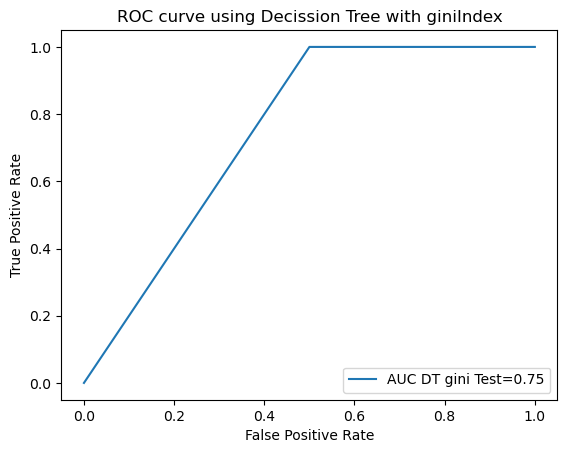

In [39]:
#Decission Tree classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

# Decision tree with giniIndex
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, y_train)
# Predicton with giniIndex
y_pred = clf_gini.predict(X_test)
print("Decision Tree with giniIndex Results")
print("Predicted values:",y_pred)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
print("Report : ",classification_report(y_test, y_pred))

#AUC & ROC CURVE 
y_pred_proba = clf_gini.predict_proba(X_test)[::,1]
fpr_DTGTEST, tpr_DTGTEST, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_DTGTEST = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr_DTGTEST,tpr_DTGTEST,label="AUC DT gini Test="+str(auc_DTGTEST))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using Decission Tree with giniIndex")
plt.show()


In [40]:
X_test1 = X_test

In [41]:
X_test1['y_pred'] = y_pred


In [42]:
X_test1.head()

,Customer_ID,Account_Type,Balance,Credit_Card,Credit_Score,Tenure,Gender,Products_number,Estimated_Salary,Transaction_Amount,Employment_Status_Employed,Employment_Status_Retired,Employment_Status_Selfemployed,Employment_Status_Unemployed,Employment_Status_Unknown,Country_France,Country_Germany,Country_Spain,y_pred
8,1008,0,7429,1,465,0,0,5,84400,-8089,0,1,0,0,0,0,0,1,0
16,1016,1,5849,0,736,8,0,4,43205,1083,1,0,0,0,0,0,1,0,1
0,1000,0,6633,0,485,5,0,3,194879,-9156,0,0,1,0,0,0,1,0,0
23,1023,0,3308,1,804,10,0,1,114265,8068,0,0,0,1,0,0,1,0,1
11,1011,1,4818,0,812,1,1,2,30297,-1,0,0,1,0,0,0,0,1,1


In [43]:
prediction_DF = final_merged_df[(final_merged_df['Customer_ID'].isin(X_test1['Customer_ID'])) & (X_test1['y_pred'] == 1)]
prediction_DF.head()

,Account_ID,Customer_ID,Account_Type,Balance,Open_Date,Last_Activity_Date,Credit_Card,Churn,Name,Age,...,Tenure,Country,Gender,Products_number,Employment_Status,Estimated_Salary,Transaction_ID,Transaction_Type,Amount,Transaction_Date
11,458444,1011,1,4818.04,2023-12-28,2024-03-19,0,0,Taylor Wright,48,...,1,Spain,1,2,Selfemployed,30297.09,325743,Transfer,4512.73,2024-03-19
16,458449,1016,1,5849.91,2016-07-28,2024-03-17,0,1,Jeffrey English,48,...,8,Germany,0,4,Employed,43205.24,163043,Deposit,1083.73,2024-03-17
23,458456,1023,0,3308.06,2014-09-11,2023-05-28,1,0,Isabel Curtis,21,...,10,Germany,0,1,Unemployed,114265.31,358405,Deposit,8068.11,2023-05-28


In [54]:
churn_Prediction_report = prediction_DF[["Customer_ID","Account_ID"]]
churn_Prediction_report.head()

,Customer_ID,Account_ID
11,1011,458444
16,1016,458449
23,1023,458456


In [61]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="ec2-3-9-191-104.eu-west-2.compute.amazonaws.com",
    port="5432",
    database="testdb",
    user="consultants",
    password="WelcomeItc@2022"
)

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

In [62]:
create_table_query = """
CREATE TABLE prediction (
    Customer_ID Int,
    Account_ID Int
)
"""
cursor.execute(create_table_query)
conn.commit()

print("DONE")

DONE


In [63]:
import psycopg2
import pandas as pd

# Function to insert values into the database
def insert_into_db(row):
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(
        host="ec2-3-9-191-104.eu-west-2.compute.amazonaws.com",
        port="5432",
        database="testdb",
        user="consultants",
        password="WelcomeItc@2022"
    )
    
    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    # SQL command to insert a row into the table
    insert_query = '''
    INSERT INTO prediction (Customer_ID, Account_ID)
    VALUES (%s, %s);
    '''
    
    # Execute the SQL command with values from the DataFrame row
    cursor.execute(insert_query, tuple(row))
    
    # Commit the transaction
    conn.commit()
    
    # Close the cursor and connection
    cursor.close()
    conn.close()

# Iterate over the rows of the DataFrame and insert values into the database
for index, row in churn_Prediction_report.iterrows():
    insert_into_db(row)


In [34]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression Results")
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))


Logistic Regression Results
Confusion Matrix : 
 [[1 3]
 [1 0]]
Accuracy :  20.0
Report :                precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.25      0.12      0.17         5
weighted avg       0.40      0.20      0.27         5



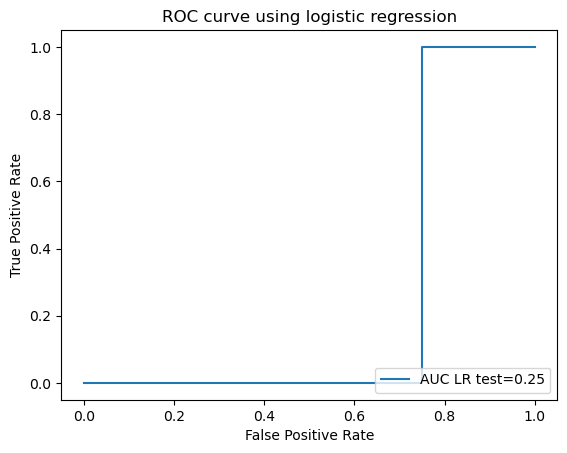

In [35]:
#define metrics Logistic regression
from sklearn import metrics

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr_lt, tpr_lt, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_lt = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr_lt,tpr_lt,label="AUC LR test="+str(auc_lt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using logistic regression")
plt.show()

Random Forest Classifier Results
Confusion Matrix : 
 [[0 4]
 [0 1]]
ACCURACY OF THE MODEL:  20.0
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.20      1.00      0.33         1

    accuracy                           0.20         5
   macro avg       0.10      0.50      0.17         5
weighted avg       0.04      0.20      0.07         5



C:\Users\cheru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cheru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cheru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


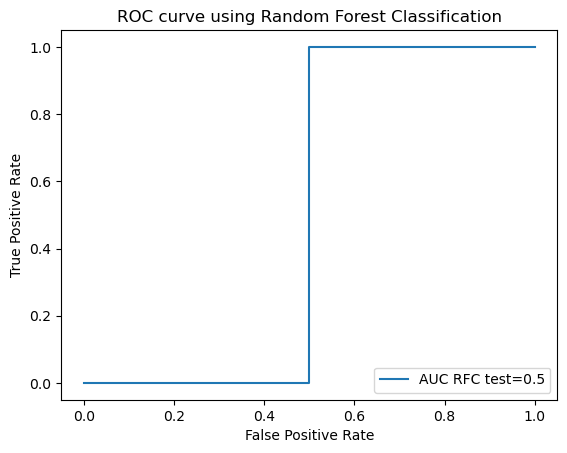

In [36]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)
pred = clf_forest.predict(X_test)
cm = confusion_matrix(y_test, pred)
print("Random Forest Classifier Results")
print ("Confusion Matrix : \n", cm)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, pred)*100)
print("Report : ",classification_report(y_test, pred))

#define metrics
from sklearn import metrics
y_pred_proba_random = clf_forest.predict_proba(X_test)[::,1]
fpr_r, tpr_r, _ = metrics.roc_curve(y_test,  y_pred_proba_random)
auc_random_test = metrics.roc_auc_score(y_test, y_pred_proba_random)

#create ROC curve
plt.plot(fpr_r,tpr_r,label="AUC RFC test="+str(auc_random_test))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using Random Forest Classification")
plt.show()